# VapoRock
* A thermodynamic model for vaporized silicate rocks & melts relevant to magma ocean atmospheres and stellar nebula

In [1]:
import vaporock

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
from thermoengine import model

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See http

In [2]:
import IPython
print(IPython.__version__)
print(pd.__version__)

8.10.0
1.5.3


Define the compostion of the melt in terms of oxides

In [3]:
# melt_comp_wts = {'MgO':36.9, 'CaO':3.3, 'Al2O3':4.6, 'SiO2':50.7, 
#                  'Na2O':3e-7, 'K2O':3e-10, 'FeO':3.5}

# BSE composition from Schaefer & Fegley (TiO2 neglected)
melt_comp_wts = {'SiO2':45.97, 'MgO':36.66, 'Al2O3':4.77, 'FeO':8.24, 
                 'CaO':3.78, 'Na2O':0.35, 'K2O':0.04}


Now, calculate the corresponding melt compostion is calculated using MELTS from thermoengine after the mantle has been melted

In [4]:
system = vaporock.System(vapor_database='JANAF0')
# system = vaporock.System(vapor_database='LAMOR')
system.set_melt_comp(melt_comp_wts)
system.print_melt_comp()

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See http

MELTS liquid components:


[('SiO2', 0.17905092548091792),
 ('TiO2', 0.0),
 ('Al2O3', 0.046357815686249346),
 ('Fe2O3', 0.0),
 ('MgCr2O4', 0.0),
 ('Fe2SiO4', 0.057344557277748086),
 ('MnSi0.5O2', 0.0),
 ('Mg2SiO4', 0.4547890552892488),
 ('NiSi0.5O2', 0.0),
 ('CoSi0.5O2', 0.0),
 ('CaSiO3', 0.0674044301472555),
 ('Na2SiO3', 0.00564707947570578),
 ('KAlSiO4', 0.0008492983733812904),
 ('Ca3(PO4)2', 0.0),
 ('H2O', 0.0)]

In [5]:
T = np.linspace(1500,3000,101)
P = 1e-10 #In bars, intital surface pressure
buffer = 'IW' # Iron-Wusite buffer
dlogfO2 = +1.5
dlogfO2 = -1.5
g=36.2
logfO2 = vaporock.redox_buffer(T, buffer=buffer, dlogfO2=dlogfO2) #Oxygen fugacity for given temperature range and Pressure

Get partial pressures, equilibrium constants, activity

In [6]:
# Optionally choose calculation method based on chemical potentials, both agree (method=['activity','chempot'])
logP, lnK, lna =  system.eval_gas_abundances(T, logfO2, full_output=True, method='activity')
print(logP)

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

                 1500.0     1515.0     1530.0     1545.0     1560.0  \
species_name                                                          
O(g)         -11.943176 -11.764964 -11.590276 -11.419010 -11.251067   
O2(g)        -13.101927 -12.920790 -12.743291 -12.569323 -12.398783   
Mg(g)         -8.598675  -8.435417  -8.275599  -8.119119  -7.965879   
MgO(g)       -13.822638 -13.595177 -13.372401 -13.154172 -12.940359   
Mg2(g)       -20.776958 -20.461087 -20.151993 -19.849474 -19.553334   
Ca(g)        -14.810952 -14.602668 -14.398698 -14.198913 -14.003190   
CaO(g)       -18.877084 -18.614661 -18.358117 -18.107251 -17.861874   
Ca2(g)       -32.430339 -32.025642 -31.629422 -31.241427 -30.861413   
Al(g)        -16.435111 -16.183119 -15.936190 -15.694176 -15.456933   
AlO(g)       -16.503225 -16.251780 -16.005420 -15.763995 -15.527359   
AlO2(g)      -21.070956 -20.779489 -20.493925 -20.214091 -19.939818   
Al2(g)       -31.880292 -31.435856 -31.000386 -30.573618 -30.155299   
Al2O(g

In [220]:
density = system.calc_column_density(logP, logfO2, g)
print((density))

#Den=pd.DataFrame(density.to_numpy())
print(Den)

                    1500.0        1515.0        1530.0        1545.0  \
species_name                                                           
O(g)          1.185050e+09  1.786276e+09  2.670766e+09  3.961884e+09   
O2(g)         4.111070e+07  6.238666e+07  9.388386e+07  1.401391e+08   
Mg(g)         1.724493e+12  2.511423e+12  3.628587e+12  5.202560e+12   
MgO(g)        6.209197e+06  1.048326e+07  1.750945e+07  2.894017e+07   
Mg2(g)        5.719380e-01  1.183640e+00  2.411644e+00  4.839853e+00   
Ca(g)         6.414672e+05  1.036234e+06  1.657402e+06  2.625504e+06   
CaO(g)        3.936916e+01  7.204076e+01  1.300537e+02  2.317335e+02   
Ca2(g)        7.704725e-13  1.956383e-12  4.871627e-12  1.190336e-11   
Al(g)         2.263846e+04  4.044262e+04  7.141150e+04  1.246759e+05   
AlO(g)        1.214845e+04  2.167531e+04  3.822305e+04  6.664246e+04   
AlO2(g)       2.395284e-01  4.686230e-01  9.044559e-01  1.722750e+00   
Al2(g)        4.061030e-12  1.129983e-11  3.079936e-11  8.228293

/Users/mcginty/Documents/vaporock/src/vaporock/equil.py:241: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  density = P_species*Navogadro/(g*species_mass[:, np.newaxis])


Sort according to abundences:

In [25]:
density_high = system.get_abundant_species(density, N=20)
print(len(density_high))

20


In [9]:
mol_elem_frac, Ptotal = system.calc_gas_props(T, logP)


In [10]:
Ptotal = np.sum(10**logP, axis=0)
print(Ptotal)

1500.0    0.000005
1515.0    0.000006
1530.0    0.000008
1545.0    0.000010
1560.0    0.000012
            ...   
2940.0    2.449270
2955.0    2.687275
2970.0    2.946303
2985.0    3.227997
3000.0    3.534107
Length: 101, dtype: float64


Text(0.5, 1.0, 'T-P plot for the atomsphere outgassed')

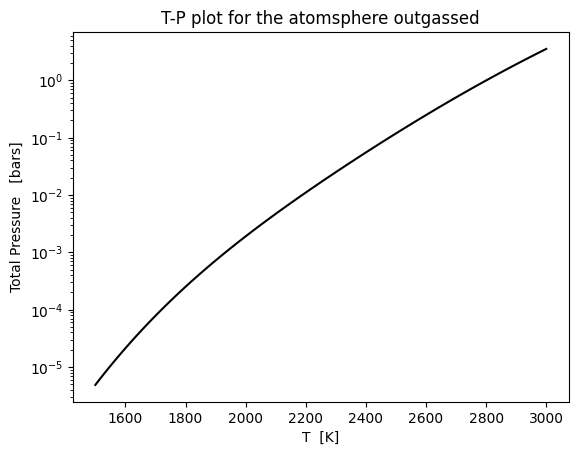

In [11]:
plt.figure()
plt.semilogy(T, Ptotal, 'k-')
plt.xlabel('T  [K]')
plt.ylabel('Total Pressure   [bars]')
plt.title('T-P plot for the atomsphere outgassed')

In [112]:
plt.rc('axes', prop_cycle=(cycler(linestyle=['-', '--', ':', '-.'])*
                           cycler(color=['c','m','k','y','r','g','b'])))

Text(0, 0.5, 'Elemental Abundance [mol fraction]')

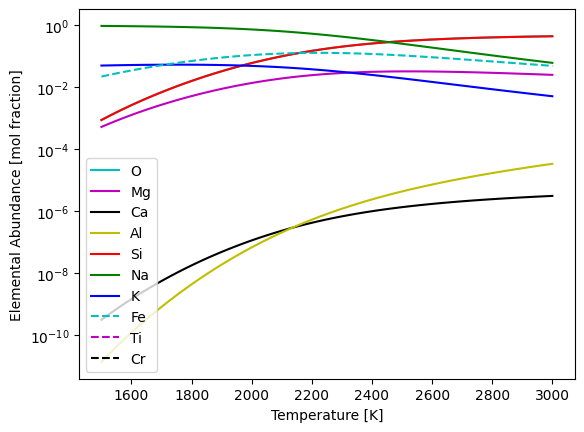

In [113]:
plt.figure()
plt.semilogy(T, mol_elem_frac.T.values)
plt.legend(mol_elem_frac.index)

plt.xlabel('Temperature [K]')
plt.ylabel('Elemental Abundance [mol fraction]')


In [ ]:

# linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
# plt.rc('axes', prop_cycle=linestyle_cycler)

plt.figure(figsize=(6,8))
plt.semilogy(T, density_high.T.values);
plt.ylim(1e15,1e20)
plt.xlim(1499,3001)
plt.legend(list(density_high.index), bbox_to_anchor=(1.05, 1))
plt. xlabel('Temperature [K]')
plt.ylabel(r'Column Density [mol / cm$^2$]')

Chaning the fo2

In the above example fo2 was represnted by the pm 1.5 value, i want to explore a range of fo2 values so will start by doubling it

In [345]:
T1 = np.linspace(1500,3000,101)
P1 = 1e-10 #In bars, intital surface pressure
buffer = 'IW' # Iron-Wusite buffer
dlogfO2 = [-4,-3,-2,-1,0,1,2,3,4,5,6,7]
g=36.2
Ptotal1=np.zeros((len(T1),len(dlogfO2)))
density1=np.zeros((len(T1),len(dlogfO2),34))
density_high1=np.zeros((len(T1),len(dlogfO2),34))
print(Ptotal1.shape,density1.shape)
mol_elem_frac1=np.zeros((len(T1),len(dlogfO2),34))
#mol_elem_frac1.shape
#Ptotal1[5,5]
for j in range(len(dlogfO2)):
        logfO21 = vaporock.redox_buffer(T1, buffer=buffer, dlogfO2=dlogfO2[j]) #Oxygen fugacity for given temperature range and Pressure
        print(i,logfO2)
        logP1, lnk1, lna1 =  system.eval_gas_abundances(T1, logfO21, full_output=True, method='activity')
        CD=np.array(system.calc_column_density(logP1, logfO21, g))
        print(CD.shape)
        CDT=np.transpose(CD)
        density1[:,j,:] = CDT
        AS = np.array(np.array(system.get_abundant_species(density1, N=20)))
        AST = np.transpose(AS)
        density_high1[:,j,:]
        MEF ,PTOTAL= np.array(system.calc_gas_props(T1, logP1))
        MEFT = np.transpose(MEF)
        mol_elem_frac1[:,j,:]
            #print(mol_elem_frac1)
        #Ptotal1[:,j]= np.array(np.sum(10**logP1, axis=0))
        #density1.shape


#print(density1)       

(101, 12) (101, 12, 34)
9 [-13.10192734 -12.9207905  -12.74329129 -12.56932293 -12.39878277
 -12.23157207 -12.06759583 -11.90676262 -11.74898441 -11.59417642
 -11.44225696 -11.29314729 -11.14677151 -11.00305641 -10.86193134
 -10.72332815 -10.58718104 -10.45342646 -10.32200304 -10.19285145
 -10.06591439  -9.94113644  -9.818464    -9.69784522  -9.57922996
  -9.46256966  -9.34781732  -9.23492743  -9.1238559   -9.01456003
  -8.90699843  -8.80113097  -8.69691876  -8.59432408  -8.49331034
  -8.39384204  -8.29588472  -8.19940496  -8.10437028  -8.01074916
  -7.91851098  -7.82762598  -7.73806528  -7.64980077  -7.56280515
  -7.47705187  -7.39251511  -7.30916976  -7.22699139  -7.14595623
  -7.06604116  -6.98722365  -6.90948178  -6.83279421  -6.75714016
  -6.68249938  -6.60885214  -6.53617924  -6.46446193  -6.39368197
  -6.32382155  -6.25486334  -6.18679041  -6.11958625  -6.05323477
  -5.98772027  -5.92302742  -5.85914128  -5.79604723  -5.73373105
  -5.67217881  -5.61137693  -5.55131215  -5.491971

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

(34, 101)


/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [341]:

density1.shape
#density1[:,:,0]


(101, 12, 34)

In [342]:
print(len(T1))
Ptotal1[:,0]

101


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

101


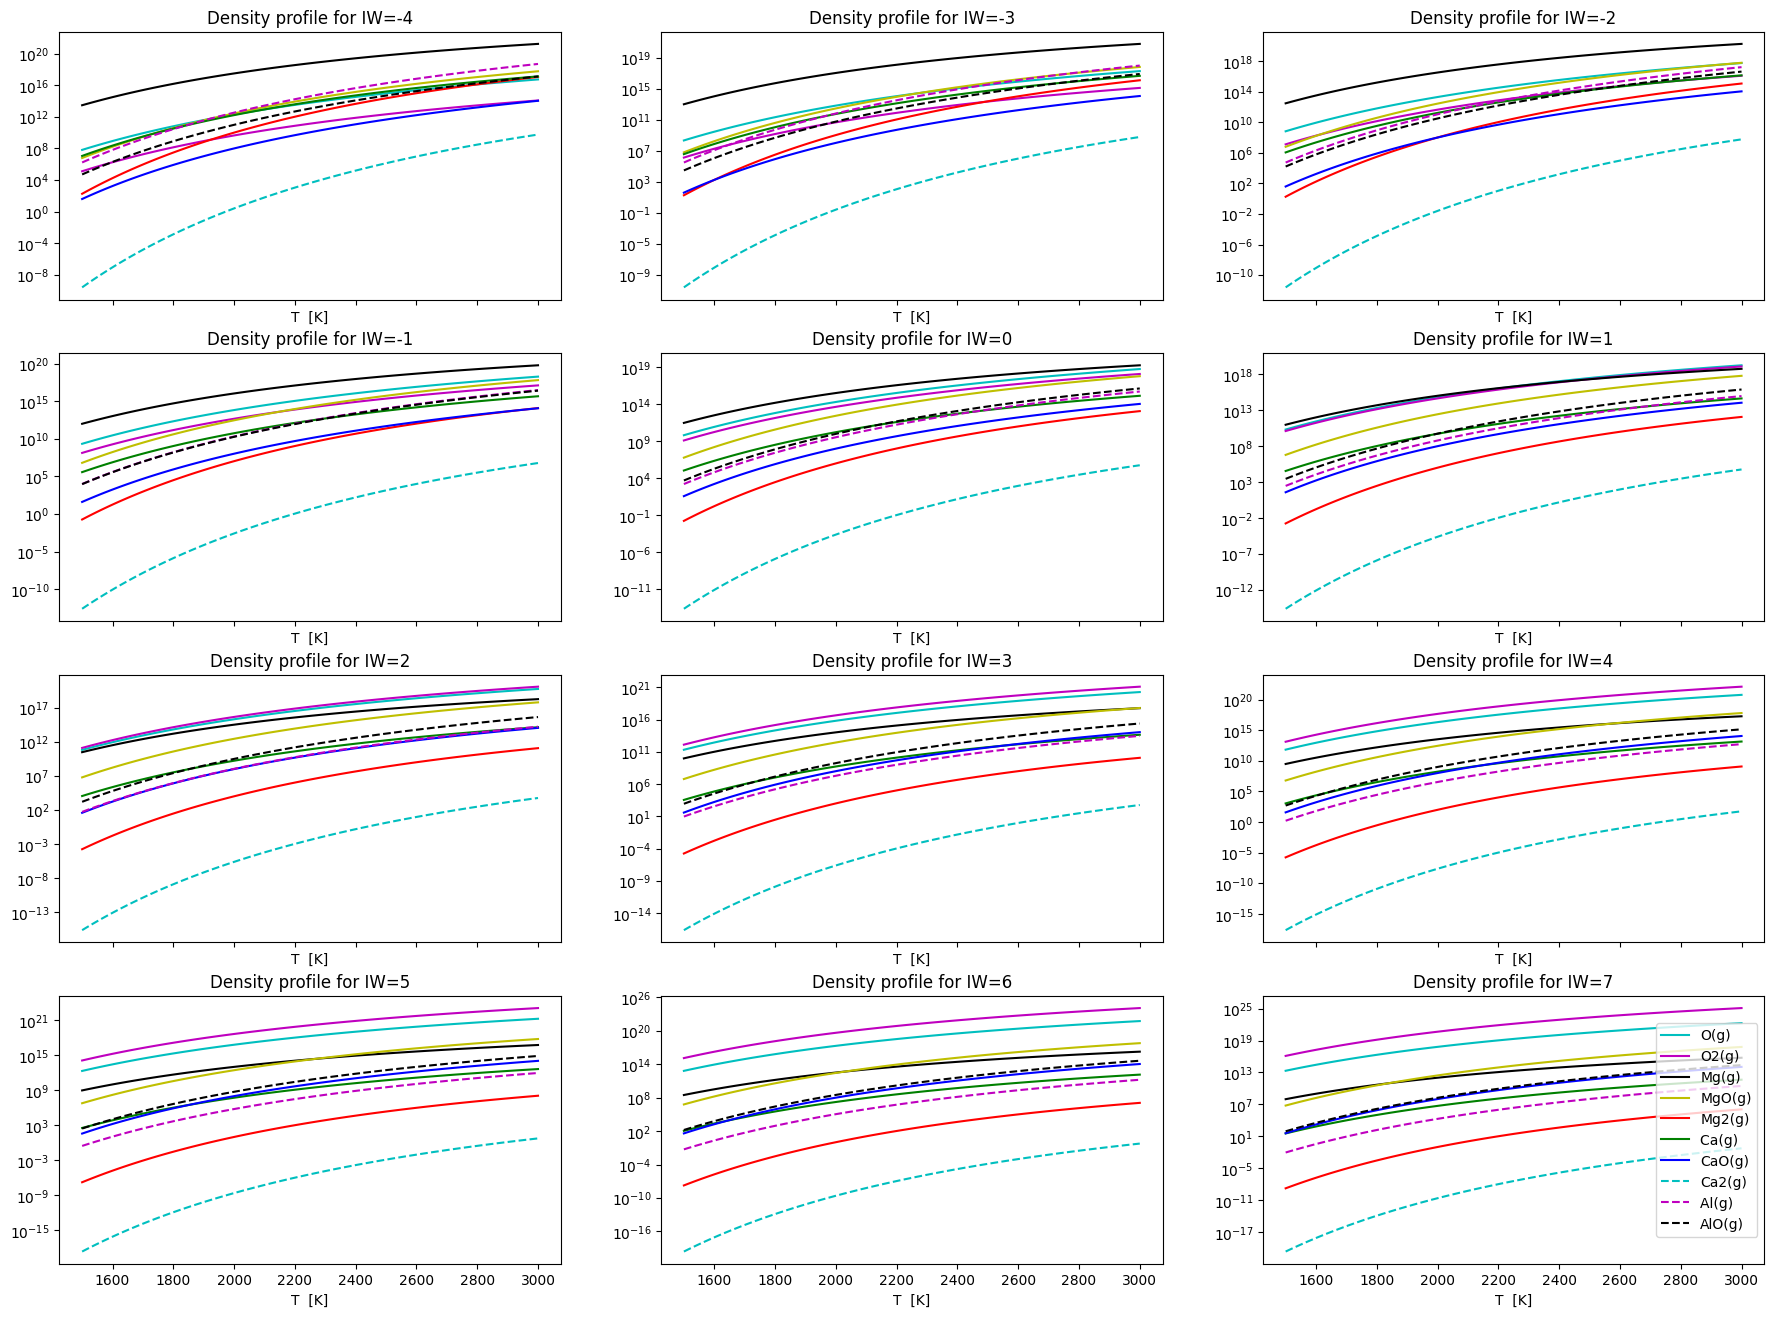

In [343]:

fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True)
axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
elements=['O(g)', 'O2(g)', 'Mg(g)', 'MgO(g)', 'Mg2(g)', 'Ca(g) ', 'CaO(g)', 'Ca2(g)', 'Al(g) ', 'AlO(g)', 'AlO2(g)', 'Al2(g)', 'Al2O(g)', 'Al2O2(g)', 'Si(g) ', 'SiO(g)', 'SiO2(g', 'Si2(g)', 'Si3(g)', 'Na(g) ', 'NaO(g)', 'Na2(g)', 'K(g)  ', 'KO(g) ', 'K2(g) ', 'Fe(g) ', 'FeO(g)', 'TiO(g)', 'Ti(g) ', 'TiO2(g)', 'Cr(g) ', 'CrO(g)', 'CrO2(g)', 'CrO3(g)']
#cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
print(len(T1))
for j in range(len(dlogfO2)):
    for i in range(10):
            ax =axes[j]
            ax.semilogy(T1, density1[:,j,i],label=elements[i])
            ax.set_xlabel('T  [K]')
            ax.set_title( "Density profile for IW=" +str(dlogfO2[j]))
            #plt.colorbar(label='fO2 values')
            #print(dlogfO2[j])
ax.legend(loc='center right')
plt.savefig('density profiles.png')

101


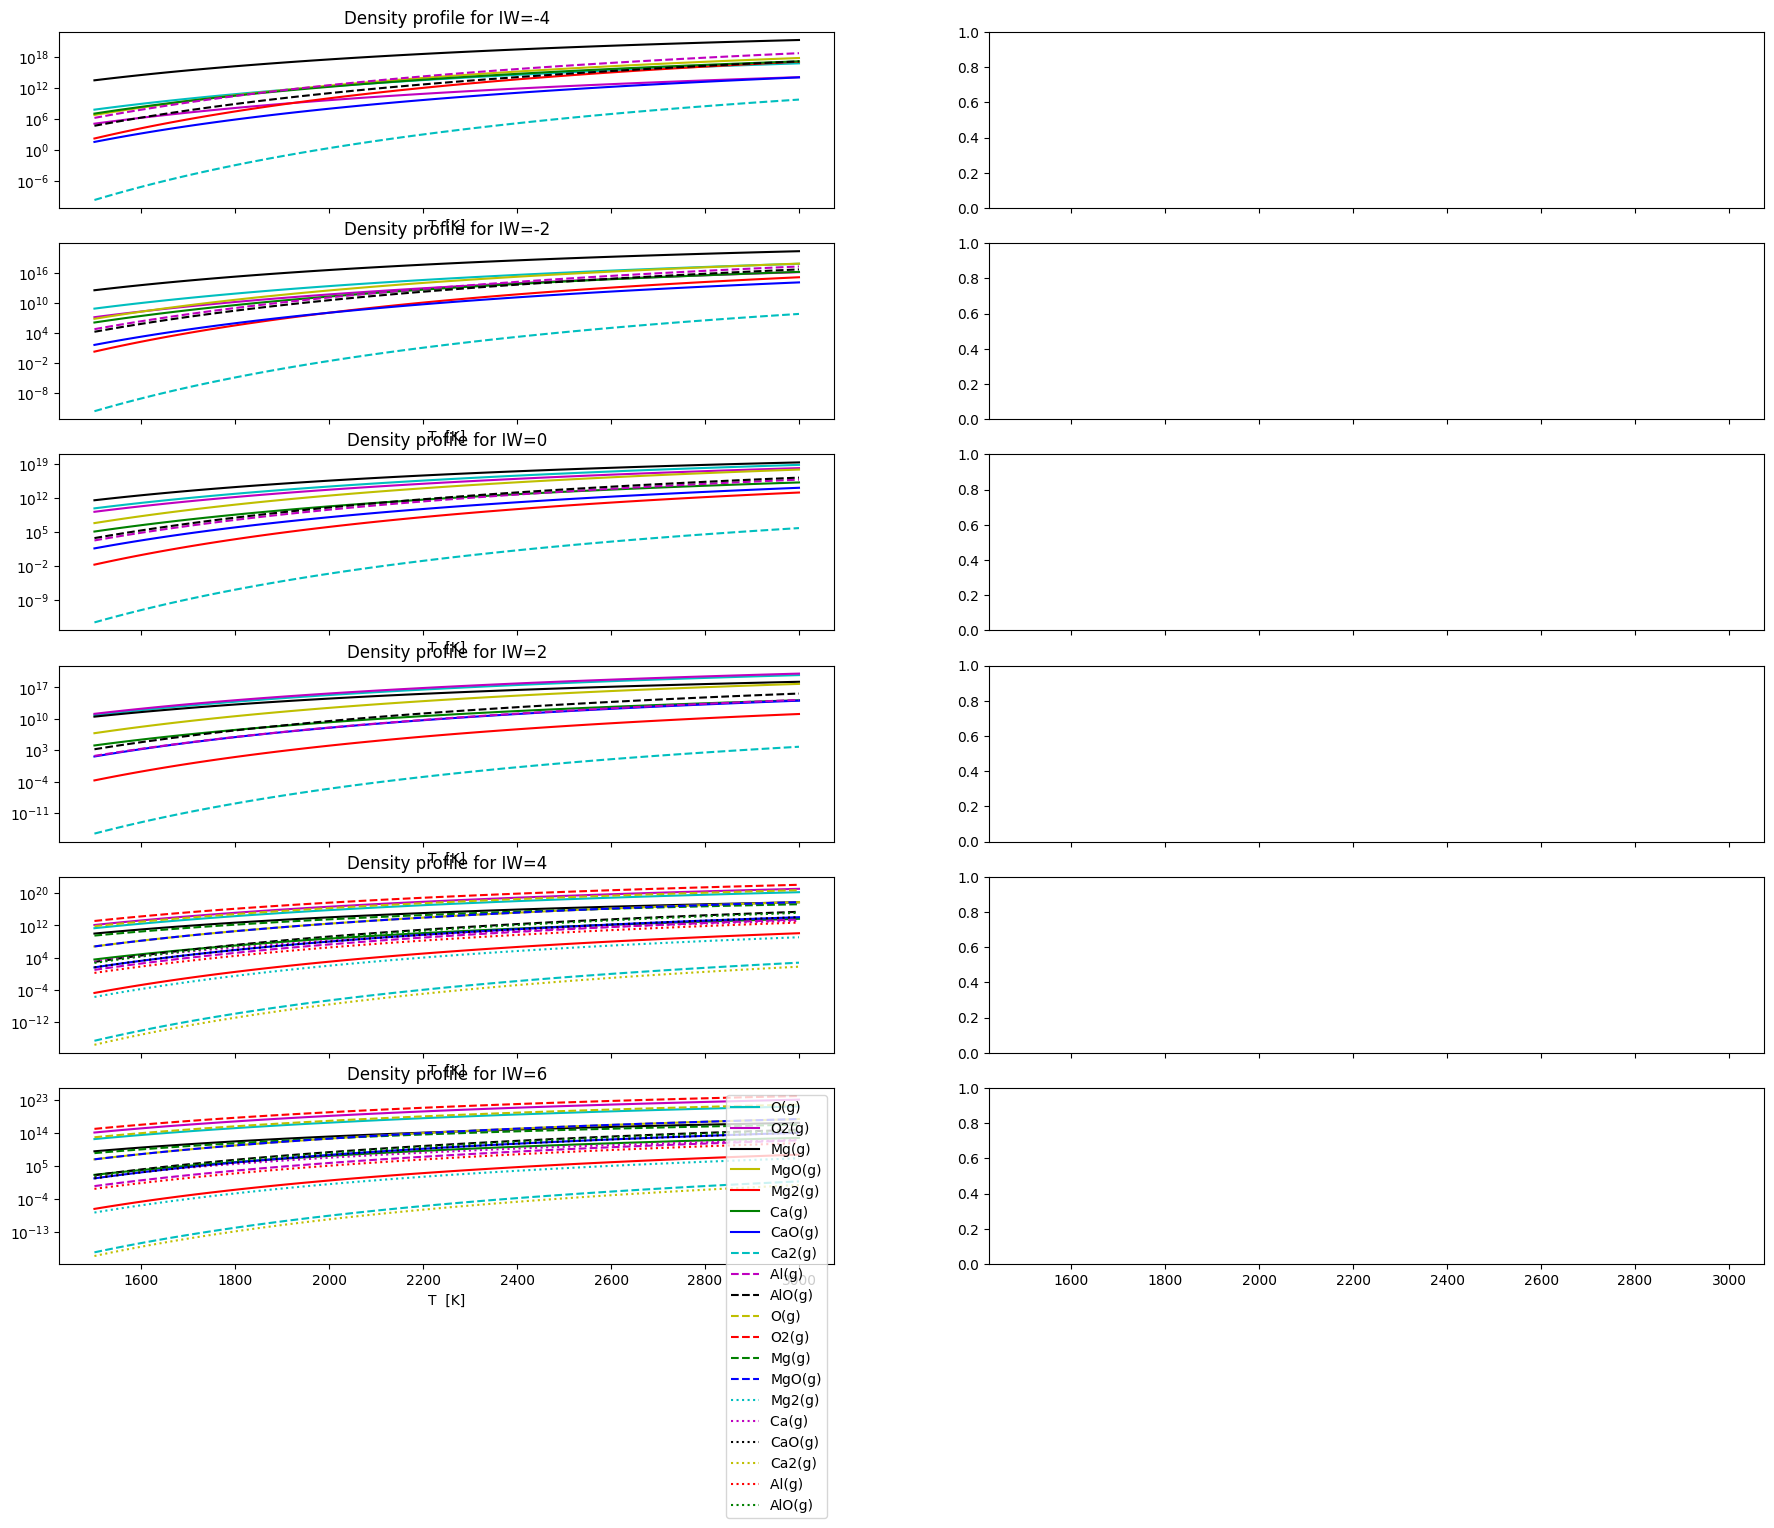

In [336]:

fig , axes = plt.subplots(nrows=6,ncols=2,figsize=(22,16),sharex=True)
axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
elements=['O(g)', 'O2(g)', 'Mg(g)', 'MgO(g)', 'Mg2(g)', 'Ca(g) ', 'CaO(g)', 'Ca2(g)', 'Al(g) ', 'AlO(g)', 'AlO2(g)', 'Al2(g)', 'Al2O(g)', 'Al2O2(g)', 'Si(g) ', 'SiO(g)', 'SiO2(g', 'Si2(g)', 'Si3(g)', 'Na(g) ', 'NaO(g)', 'Na2(g)', 'K(g)  ', 'KO(g) ', 'K2(g) ', 'Fe(g) ', 'FeO(g)', 'TiO(g)', 'Ti(g) ', 'TiO2(g)', 'Cr(g) ', 'CrO(g)', 'CrO2(g)', 'CrO3(g)']
#cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
print(len(T1))
for j in range(-4,12,2):
    for i in range(10):
            #print(j)
            ax =axes[j]
            ax.semilogy(T1, density1[:,j,i],label=elements[i])
            ax.set_xlabel('T  [K]')
            ax.set_title( "Density profile for IW=" +str(dlogfO2[j]))
            #plt.colorbar(label='fO2 values')
            #print(dlogfO2[j])
ax.legend()
plt.savefig('density profiles for selected IW.png')

(101, 11)


/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


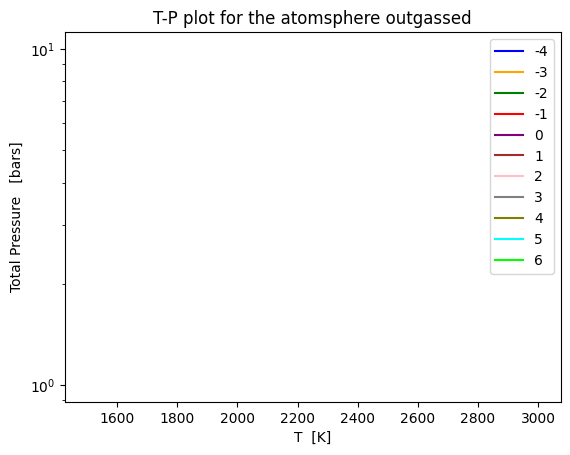

In [314]:
plt.figure()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
colors=['blue','orange','green','red','purple','brown','pink','gray','olive','cyan','lime','black']
for i in range(len(dlogfO2)):
    #cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
    plt.semilogy(T1, Ptotal1[:,i], color=colors[i],linestyle='-',label=dlogfO2[i])
    plt.xlabel('T  [K]')
    plt.ylabel('Total Pressure   [bars]')
    plt.title('T-P plot for the atomsphere outgassed')
    plt.legend()
#plt.colorbar(label='fO2 values')
print(Ptotal1.shape)

In [ ]:
density = system.calc_column_density(logP, logfO2, g)

In [ ]:
density_high = system.get_abundant_species(density, N=20)


In [ ]:
mol_elem_frac, Ptotal = system.calc_gas_props(T, logP)

In [ ]:
Ptotal = np.sum(10**logP, axis=0)
# Ptotal

In [ ]:
plt.figure()
plt.semilogy(T, Ptotal, 'k-')
plt.xlabel('T  [K]')
plt.ylabel('Total Pressure   [bars]')
plt.title('T-P plot for the atomsphere outgassed')

In [ ]:
plt.figure()
plt.semilogy(T, mol_elem_frac.T.values)
plt.legend(mol_elem_frac.index)

plt.xlabel('Temperature [K]')
plt.ylabel('Elemental Abundance [mol fraction]')


In [ ]:

# linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
# plt.rc('axes', prop_cycle=linestyle_cycler)

plt.figure(figsize=(6,8))
plt.semilogy(T, density_high.T.values);
plt.ylim(1e15,1e20)
plt.xlim(1499,3001)
plt.legend(list(density_high.index), bbox_to_anchor=(1.05, 1))
plt. xlabel('Temperature [K]')
plt.ylabel(r'Column Density [mol / cm$^2$]')